# 【AAPlot for Animal Behavior (Pretreat)】
## Extract speed and trajectory of EzTrack exported .csv file

Run under `PLOT` environment
    
The `PLOT` enviorment：
- Python3.12.7
- pandas
- numpy
- matplotlib
- seaborn
- ipykernel

*Warning*

*! Make sure you have installed `Anaconda`，and added to PATH（refering to internet）*

*! Make sure you have already confiured the `PLOT` environment, if not, run this command: `conda env create -n PLOT python=3.12.7 pandas numpy matplotlib seaborn ipykernel` (If you are using ARM64 CPU, use Python3.13.3 intead，add `conda-forge` at the end of command)*

*Apply `PLOT` in VScode ：Select in the Kernel*

*Apply `PLOT` in terminal：`conda activate PLOT`*

### Data Input

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
import os  # Added for file path operations

Filename = r'D:\Temp\DrugIntake behavior\THC\female\C94 2mpk-short_LocationOutput.csv'  # for Windows
# Filename = 'Test.csv' # for Linux/MacOS

# Read the CSV file
df = pd.read_csv(Filename)

# Extract data and convert to appropriate units
frame_numbers = df['Frame']
time_seconds = frame_numbers / 30  # Convert frames to seconds (30Hz)
distance_cm = df['Distance_cm']  # Already in cm

# Calculate speed in cm/s (multiply by frame rate since distance_cm is per frame)
speed_cm_s = distance_cm * 30  # Convert cm/frame to cm/s

# Calculate cumulative distance
cumulative_distance_cm = distance_cm.cumsum()

# Create a summary dataframe
summary_df = pd.DataFrame({
    'Time_seconds': time_seconds,
    'Distance_cm': distance_cm,
    'Speed_cm_s': speed_cm_s,
})

print("Data Summary:")
print(summary_df.head())
print("\nNote: All distances in centimeters, time in seconds, speed in cm/s")

Data Summary:
   Time_seconds  Distance_cm  Speed_cm_s
0      0.000000     0.000000    0.000000
1      0.033333     0.266663    7.999886
2      0.066667     0.277643    8.329298
3      0.100000     0.768208   23.046250
4      0.133333     0.172630    5.178911

Note: All distances in centimeters, time in seconds, speed in cm/s


### Plot and Export

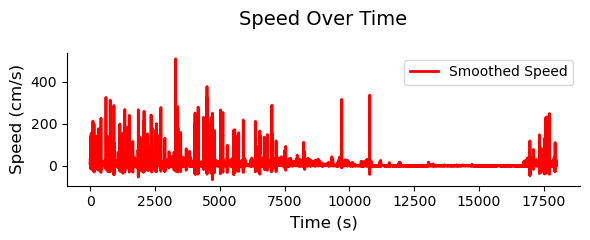


Total distance traveled: 99405.28 cm
Average distance per frame: 0.1841 cm

Files saved in: D:\Temp\DrugIntake behavior\THC\female
- C94 2mpk-short_LocationOutput_TimeOverSpeed.svg
- C94 2mpk-short_LocationOutput_TimeOverSpeed.csv


In [59]:
# Time-Speed Plot (with Savitzky-Golay filter)
fig, ax = plt.subplots(figsize=(6, 2.5))  # Width reduced by 50%, height by 40%

# Apply Savitzky-Golay filter
data_length = len(speed_cm_s)
window_length = min(31, data_length)  # About 1 second, ensuring it's less than data length
if window_length % 2 == 0:  # Make sure window length is odd
    window_length -= 1
polyorder = 2  # Lower polynomial order for smoother result
smooth_speed = savgol_filter(speed_cm_s, window_length=window_length, polyorder=polyorder)

# Plot smoothed speed
ax.plot(time_seconds, smooth_speed, 'r-', linewidth=2, label='Smoothed Speed')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_title('Speed Over Time', pad=20, fontsize=14)
ax.set_xlabel('Time (s)', fontsize=12)
ax.set_ylabel('Speed (cm/s)', fontsize=12)
ax.legend(fontsize=10)
ax.grid(False)  # Remove grid

plt.tight_layout()

# Get the directory of the input file
input_dir = os.path.dirname(Filename)
base_name = os.path.splitext(os.path.basename(Filename))[0]

# Create full paths for output files
speed_plot_filename = os.path.join(input_dir, f"{base_name}_TimeOverSpeed.svg")
speed_data_filename = os.path.join(input_dir, f"{base_name}_TimeOverSpeed.csv")

# Save the plot
plt.savefig(speed_plot_filename, format='svg', bbox_inches='tight', dpi=300)
plt.show()

# Calculate average distance per frame
avg_distance = distance_cm.mean()

# Print distance statistics
print(f"\nTotal distance traveled: {cumulative_distance_cm.iloc[-1]:.2f} cm")
print(f"Average distance per frame: {avg_distance:.4f} cm")

# Create and save a CSV file with time and smoothed speed data
time_speed_df = pd.DataFrame({
    'Time(s)': time_seconds,
    'Speed(cm/s)': smooth_speed
})

# Save to CSV in the same directory as the input file
time_speed_df.to_csv(speed_data_filename, index=False)
print(f"\nFiles saved in: {input_dir}")
print(f"- {os.path.basename(speed_plot_filename)}")
print(f"- {os.path.basename(speed_data_filename)}")